# Session 13: APIs, word2vec, Python
MSA 8010: Data Programming

Agenda:
- APIs (REST)
- Word2vec model
- IDEs and debugging
- Virtual Environments
- Unpacking and packing variables
- Documentation
    - docstring
    - markdown
- Sentiment Analysis
Sources:
- https://www.w3schools.com/js/js_api_intro.asp
- https://medium.com/@zafaralibagh6/a-simple-word2vec-tutorial-61e64e38a6a1
- https://kavita-ganesan.com/easily-access-pre-trained-word-embeddings-with-gensim/
- https://pantelis.github.io/cs634/docs/common/lectures/nlp/word2vec/
- https://radimrehurek.com/gensim/models/keyedvectors.html
- https://www.sciencedirect.com/topics/computer-science/cosine-similarity
- https://www.learndatasci.com/glossary/cosine-similarity/
- https://medium.com/techtofreedom/six-debugging-techniques-for-python-programmers-cb25a4baaf4b
- https://realpython.com/python-logging/
- https://docs.python.org/3.7/tutorial/venv.html
- https://www.geeksforgeeks.org/packing-and-unpacking-arguments-in-python/
- https://www.pythontutorial.net/python-basics/python-comments/
- https://softdev4research.github.io/4OSS-lesson/03-use-license/index.html
- https://www.tensorflow.org/tutorials/keras/text_classification_with_hub

## Web APIs

- API stands for **A**pplication **P**rogramming **I**nterface.
- A _Web API_ is an application programming interface for the Web.
- Web APIs are exposed with endpoints (i.e, URLs) to developers.
- Web APIs typically expressed in JSON or XML.
- REST is today's dominant architecture for Web APIs on the internet.

## REST

- REST stands for **RE**presentational **S**tate **T**ransfer. 
- REST is web standards based architecture and uses HTTP Protocol. 
- In REST architecture, a REST Server simply provides access to resources and REST client accesses and modifies the resources.

- Following four HTTP methods are commonly used in REST based architecture.

    - `GET` − Provides a read only access to a resource.

    - `POST` − Used to create a new resource.

    - `DELETE` − Used to remove a resource.

    - `PUT` − Used to update a existing resource or create a new resource.

### REST - Example

- NASA provides the current location of the International Space Station Current Location in JSON format:
    - http://api.open-notify.org/iss-now.json
- It is easy to call the above endpoint in a web API call with Python's `requests` library.

In [1]:
import requests

def get_ISS_location():
    url = 'http://api.open-notify.org/iss-now.json'
    r = requests.get(url)
    data = r.json()
    return data
data = get_ISS_location()
data #prints current location of the ISS

{'timestamp': 1637257008,
 'message': 'success',
 'iss_position': {'latitude': '-49.6777', 'longitude': '-134.7312'}}

In [2]:
dt = data['timestamp']
lat = data['iss_position']['latitude']
lon = data['iss_position']['longitude']
print(dt, lat, lon)

1637257008 -49.6777 -134.7312


We can enhance the `get_ISS_location` method to return useful data only.

In [3]:
from time import sleep
from datetime import datetime

def get_ISS_location():
    url = 'http://api.open-notify.org/iss-now.json'
    r = requests.get(url)
    data = r.json()
    dt = data['timestamp']
    lat = data['iss_position']['latitude']
    lon = data['iss_position']['longitude']
    return dt, lat, lon

In [4]:
#Creating a dataframe from the API
import pandas as pd

data=[]
for i in range(5):
    dt,lat,lon = get_ISS_location()
    data.append({'Timestamp': dt, 'Latitude': lat, 'Longitude': lon})
    sleep(1)
df = pd.DataFrame(data)
df

,Timestamp,Latitude,Longitude
0,1637257008,-49.6868,-134.6854
1,1637257009,-49.7050,-134.5938
2,1637257011,-49.7321,-134.4562
3,1637257012,-49.7500,-134.3644
4,1637257013,-49.7679,-134.2725


#### cartopy 

Cartopy is a Python package designed for geospatial data processing in order to produce maps and other geospatial data analyses.

- Installation
   - with `conda`: `conda install -c conda-forge cartopy`
   - or, with `pip`: `pip install cartopy`

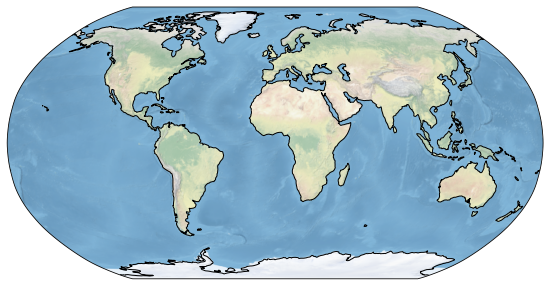

In [5]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

ax.stock_img()
ax.coastlines()

plt.show()

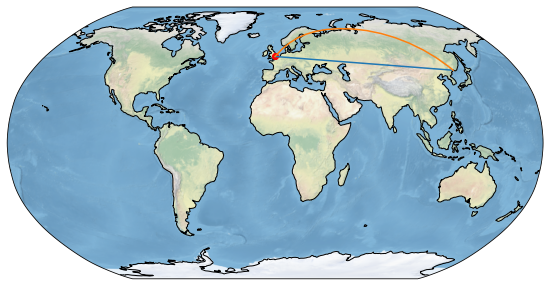

In [6]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
ax.stock_img()
ax.coastlines()
ax.plot(-0.08, 51.53, 'or', transform=ccrs.PlateCarree())
ax.plot([-0.08, 132], [51.53, 43.17], transform=ccrs.PlateCarree())
ax.plot([-0.08, 132], [51.53, 43.17], transform=ccrs.Geodetic())
plt.show()

Using the library, we can show the ISS location that we have stored in a dataframe.

In [7]:
from_lat = float(df.iloc[0]["Latitude"])
to_lat = float(df.iloc[-1]["Latitude"])
from_lon = float(df.iloc[0]["Longitude"])
to_lon= float(df.iloc[-1]["Longitude"])
print("From:", from_lat, from_lon)
print("To:", to_lat, to_lon)

From: -49.6868 -134.6854
To: -49.7679 -134.2725


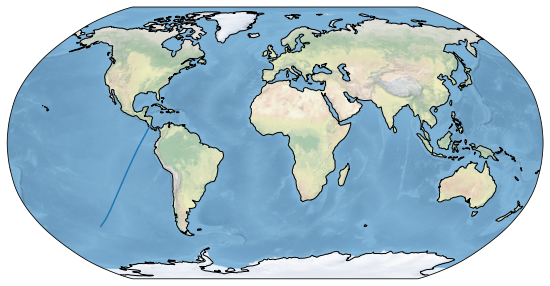

In [9]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
ax.set_global()
ax.stock_img()
ax.coastlines()
# [from_lon, to_lon], [from_lat, to_lat]
ax.plot([from_lon, to_lon], [from_lat, to_lat], transform=ccrs.Geodetic())
plt.show()

### APIs- More Resources

- There are thousands of free and proprietary APIs available online.

- A good directory to find APIs is the [Programmable Web](https://www.programmableweb.com/) website:
    - https://www.programmableweb.com/apis/directory

## NLP- Text Similarity

- So far we have learned how to pre-process texts to have a uniform representation of words.
- But how can we make machines able to understand similarities of two words?
    - For example, is the word `lion` more similar to `strong`, or more similar to `laptop`?
- Finding similarities is important for many applications such as:
    - Recommending similar books, next word prediction (similar to typing in google search box), document classification.

## NLP- Text Embedding

- A common method to find similarities between words and documents is converting them into vectors.
- Imagine an algorithm that converts each word to a vector with three dimensions. For example: 
    - *lion* to `[10,204,-20]` 
    - *strong* to `[11, 200, 2]`
    - *laptop* to `[120,1,102]`

## NLP- Text Embedding

- If we compare vectors, we can find which words are more similar:
    - lion - strong = `[10,204,-20] - [11, 200, 2]` = `[-1, 4, -18]`
    - lion - laptop = `[10,204,-20] - [120,1,102]` = `[-110, -200, 82]`
- In this case, we see *lion* is more similar to *strong*, than a *laptop*.
- It will be very exciting, if the vector we achieved by deducting *strong* from *lion* (i.e., `[-1, 4, -18]`) also has a meaning: *cat*.

## NLP- Word2vec Example

- The previous hypothetical algorithm, was a very simplified example of the `word2vec`.
- Next slides shows a real example of the word `georgia` in a pre-trained word2vec model that is mapped to a 3d shape with t-SNE algorithm. 
    - *(click on the image to enlarge)*
    - Notice how states are close to each other.
    - Notice how `azerbaijan`, `turkey`, and `armenia` are close in one dimension, but far in other dimension.
- Spend a few minutes to check out other words:
    - https://projector.tensorflow.org/



<a href="georgiaword2vec.png"> <img src="georgiaword2vec.png" width="1000" /> </a>

### Word2vec

- One of key ideas that made NLP successful is the *distributional semantics* that originated from Firth’s work: a word’s meaning is given by the words that frequently appear close-by. 
- When a word $x$ appears in a text, its context is the set of words that appear nearby (within a fixed-size window). - This is the main idea behind word2vec word embeddings (representations).


### Word2vec- A brief history

- In 2012, _Thomas Mikolov_, an intern at Microsoft, found a way1 to encode the meaning of words in a modest number of vector dimensions $d$. 
- Mikolov trained a neural network to predict word occurrences near each target word. 
- In 2013, once at Google, Mikolov and his teammates released the software for creating these word vectors and called it _word2vec_.
- Next slide shows an example of word2vec generated embedding for the word banking in `d=8` dimensions


<img src="banking-vector.png" />


Many text embedding techniques use _cosine similarity_ as a measurement to find words similar, or dissimilar to each other.

### Cosine Similarity

Let's say we have two vectors $D1$, and $D2$:

$D1 = [1,1,1,1,1,0,0]$

$D2 = [0,0,0,1,1,1,1]$


Using these two vectors we can calculate cosine similarity.

First, we calculate the dot product of the vectors:

$D1 \cdot D2 = 1\times0+1\times0+1\times0+1\times1+1\times1+0\times1+0\times1=2$

Second, we calculate the magnitude of the vectors:

$\|D1\| = \sqrt {1\times1+1\times1+1\times1+1\times1+1\times1+0\times0+0\times0}=\sqrt5$

$\|D2\| = \sqrt {0\times0+0\times0+0\times0+1\times1+1\times1+1\times1+1\times1}=\sqrt4$



Finally, cosine similarity can be calculated by dividing the dot product by the magnitude:

$similarity(D1, D2) =\frac{D1 \cdot D2}{\|D1\|\|D2\|} = \frac {2}{\sqrt5 \sqrt4} = \frac {2} {\sqrt{20}} = 0.44721$

### Exercise 1:

Complete the code to return cosine similarity.

Tip:
   - Instead of `cosine_similarity = 0`, use the similarity formula:
       - $similarity(x, y) =\frac{x \cdot y}{\|x\|\|y\|}$

In [10]:
import numpy as np

def cosine_similarity(x, y):
    
    # Ensure length of x and y are the same
    if len(x) != len(y) :
        return None
    
    # Compute the dot product between x and y
    dot_product = np.dot(x, y)
    
    # Compute the L2 norms (magnitudes) of x and y
    magnitude_x = np.sqrt(np.sum(x**2)) 
    magnitude_y = np.sqrt(np.sum(y**2))
    
    # Compute the cosine similarity
    cosine_similarity = 0  # cosine_similarity = ???
    
    return cosine_similarity

### Word2vec- Using the model

To run the word2vec locally, there are two ways:

1. Train a model with your data (e.g., science fiction books texts)
    - Advantage: The model will be tuned for the context of the data
    - Disadvantage: On large data, it takes many hours, or even days to train a good model
2. Use an available pre-trained model:
    - Advantage: No need for training, and trained on massive amount of data (e.g., all wikipedia texts, or millions of news websites)
    - Disadvantage: unaware of the context



#### gensim 

Gensim is a Python library for NLP tasks.

- Installation
   - with `conda`: `conda install -c anaconda gensim`
   - or, with `pip`: `pip install --upgrade gensim`

### Using a pre-trained model - Option 1

- For this example, we use [GloVe](https://nlp.stanford.edu/projects/glove/), and use the `gensim` library to create the model.
- We chose this model becasue data are smaller than other pre-trained models, and using `gensim`, we can easily make the GloVe model to work same as the word2vec.
- If you want to run the model your machine, you can:
    - Download http://nlp.stanford.edu/data/glove.6B.zip (822 MB)
    - Unzip the archive and copy one of the models (e.g., `glove.6B.50d.txt`) to your notebook's directory.
    - You can remove the zip file, and extracted files after copying a model to save space.

### Using a pre-trained model - Option 2

- Instead of directly downloading data files, you can use Python and gensim library to download pre-trained models. 

    - For examaple, to download `word2vec-google-news-300` (almost 1.5 GB)

In [11]:
# based on the internet connection speed, might take a few minutes
import smart_open
smart_open.open = smart_open.smart_open
from gensim.models import Word2Vec 
import gensim.downloader as api

v2w_model = api.load('word2vec-google-news-300')

In [12]:
print(v2w_model["hello"].shape)
print(v2w_model["hello"])

(300,)
[-0.05419922  0.01708984 -0.00527954  0.33203125 -0.25       -0.01397705
 -0.15039062 -0.265625    0.01647949  0.3828125  -0.03295898 -0.09716797
 -0.16308594 -0.04443359  0.00946045  0.18457031  0.03637695  0.16601562
  0.36328125 -0.25585938  0.375       0.171875    0.21386719 -0.19921875
  0.13085938 -0.07275391 -0.02819824  0.11621094  0.15332031  0.09082031
  0.06787109 -0.0300293  -0.16894531 -0.20800781 -0.03710938 -0.22753906
  0.26367188  0.012146    0.18359375  0.31054688 -0.10791016 -0.19140625
  0.21582031  0.13183594 -0.03515625  0.18554688 -0.30859375  0.04785156
 -0.10986328  0.14355469 -0.43554688 -0.0378418   0.10839844  0.140625
 -0.10595703  0.26171875 -0.17089844  0.39453125  0.12597656 -0.27734375
 -0.28125     0.14746094 -0.20996094  0.02355957  0.18457031  0.00445557
 -0.27929688 -0.03637695 -0.29296875  0.19628906  0.20703125  0.2890625
 -0.20507812  0.06787109 -0.43164062 -0.10986328 -0.2578125  -0.02331543
  0.11328125  0.23144531 -0.04418945  0.1083984

In [13]:
# This script allows to convert GloVe vectors into the word2vec. 
# Both files are presented in text format and almost identical except that 
# word2vec includes number of vectors and its dimension
# which is only difference regard to GloVe.

from gensim.scripts.glove2word2vec import glove2word2vec

glove_input_file = 'glove.6B.50d.txt'
word2vec_output_file = 'glove.6B.50d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

C:\Users\Zealotcrazy\anaconda3\envs\msa8010\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  # Remove the CWD from sys.path while we load stuff.


(400000, 50)

In [14]:
#This code takes a while to complete
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format(word2vec_output_file)
print(type(model))

<class 'gensim.models.keyedvectors.KeyedVectors'>


In [15]:
print(model["king"].shape)

(50,)


In [16]:
print(model["king"]) #prints a vector of 50 values for the word 'king'

[ 0.50451   0.68607  -0.59517  -0.022801  0.60046  -0.13498  -0.08813
  0.47377  -0.61798  -0.31012  -0.076666  1.493    -0.034189 -0.98173
  0.68229   0.81722  -0.51874  -0.31503  -0.55809   0.66421   0.1961
 -0.13495  -0.11476  -0.30344   0.41177  -2.223    -1.0756   -1.0783
 -0.34354   0.33505   1.9927   -0.04234  -0.64319   0.71125   0.49159
  0.16754   0.34344  -0.25663  -0.8523    0.1661    0.40102   1.1685
 -1.0137   -0.21585  -0.15155   0.78321  -0.91241  -1.6106   -0.64426
 -0.51042 ]


In [17]:
print(model["man"])

[-0.094386  0.43007  -0.17224  -0.45529   1.6447    0.40335  -0.37263
  0.25071  -0.10588   0.10778  -0.10848   0.15181  -0.65396   0.55054
  0.59591  -0.46278   0.11847   0.64448  -0.70948   0.23947  -0.82905
  1.272     0.033021  0.2935    0.3911   -2.8094   -0.70745   0.4106
  0.3894   -0.2913    2.6124   -0.34576  -0.16832   0.25154   0.31216
  0.31639   0.12539  -0.012646  0.22297  -0.56585  -0.086264  0.62549
 -0.0576    0.29375   0.66005  -0.53115  -0.48233  -0.97925   0.53135
 -0.11725 ]


In [18]:
print(model["king"]-model["man"])

[ 0.59889597  0.256      -0.42293     0.43248898 -1.04424    -0.53832996
  0.2845      0.22305998 -0.5121     -0.4179      0.031814    1.34119
  0.619771   -1.53227     0.08638     1.28       -0.63721    -0.95950997
  0.15139002  0.42474002  1.0251501  -1.40695    -0.147781   -0.59694004
  0.02067     0.58640003 -0.36815006 -1.4889     -0.73294     0.62635
 -0.6197001   0.30341998 -0.47487003  0.45971     0.17943001 -0.14885001
  0.21805    -0.243984   -1.0752699   0.73195004  0.487284    0.54300994
 -0.9561     -0.5096     -0.81159997  1.3143599  -0.43008003 -0.63135
 -1.1756101  -0.39317003]


#### Gensim's Word2vec.most_similar method

This method computes cosine similarity between a simple mean of the projection weight vectors of the given words and the vectors for each word in the model.

- Important parameters:
    - `positive=[]` Positive words contribute positively towards the similarity.
    - `negative=[]` Negative words contribute negatively.
    - `topn=10` Find the top-N most similar words.

- Another classic example that shows the power of word2vec representations to encode analogies, is:
    - `king + woman − man` $≈$ `queen`
    
Note: Vector size of 2 in this image are for explanation only, in `doc2vec` models we usually have vector size of at least 50.
<img src="queen-example.png" />


In [19]:
#In other words, (woman + king) - man = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=5)
result

[('queen', 0.8523604273796082),
 ('throne', 0.7664334177970886),
 ('prince', 0.7592144012451172),
 ('daughter', 0.7473883628845215),
 ('elizabeth', 0.7460220456123352)]

In [20]:
result = model.most_similar(positive=['georgia'], negative=['tbilisi'], topn=5)
result

[('carolina', 0.6983288526535034),
 ('texas', 0.6837131977081299),
 ('virginia', 0.6806227564811707),
 ('arizona', 0.6649767756462097),
 ('kansas', 0.6638627648353577)]

In [21]:
result = model.most_similar(positive=['georgia'], negative=['atlanta'], topn=5)
result

[('abkhazia', 0.6931027173995972),
 ('ossetia', 0.6868637800216675),
 ('abkhaz', 0.6781697273254395),
 ('ossetian', 0.6620948314666748),
 ('hatay', 0.6597310304641724)]

In [22]:
print(model.doesnt_match("pizza pepperoni pineapple cheese spinach".split()))

pineapple


In [23]:
similarity = model.similarity('woman', 'man')
print(similarity > 0.8)

print(model.similarity('pizza', 'cheese'))
print(model.similarity('pizza', 'pineapple'))

True
0.70875573
0.5395935


In [24]:
result = model.similar_by_word("cat")
most_similar_key, similarity = result[0]  # look at the first match
print(f"{most_similar_key}: {similarity:.4f}")

dog: 0.9218


In [25]:
distance = model.distance("media", "media")
print(f"{distance:.1f}")

0.0


### Tensorflow

- Tensorflow library, maintened by Google, allows developers to create large-scale neural networks with many layers.
- TensorFlow is mainly used for: Classification, Perception, Understanding, Discovering, Prediction and Creation.
- The `keras` library is built on top of tensorflow.
- Installation (use `pip`):
    - `pip install pip --upgrade`
    - `pip install tensorflow-cpu`


## Sentiment Analysis

- Sentiment Analysis is a task to systematically identify, extract, quantify, and study affective states and subjective information. 
- Sentiment analysis is widely applied to voice of the customer materials such as:
    - reviews and survey responses, 
    - online and social media, and 
    - healthcare materials for applications that range from marketing to customer service to clinical medicine.

#### TFDS (Tensorflow Datasets)

TFDS provides a collection of ready-to-use datasets for use with TensorFlow, Jax, and other Machine Learning frameworks.

It handles downloading and preparing the data deterministically and constructing a `tf.data.Dataset` (or `np.array`).
- Installation
   - Use `pip`: `pip install tensorflow tensorflow-cpu tensorflow_datasets tensorflow-hub --upgrade`

In [26]:
#As of 11/16/2021, the latest version is 2.7.0
import tensorflow as tf
print("tf version:",tf.__version__)

tf version: 2.7.0


#### Available datasets in TFDS

In [27]:
import tensorflow_datasets as tfds
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'd4rl_adroit_door',
 'd4rl_adroit_hammer',
 'd4rl_adroit_pen',
 'd4rl_adroit_relocate',
 'd4rl_mujoco_ant',
 'd4

#### IMDB dataset

- This dataset contains the text of 50,000 movie reviews. 
- These are split into 25,000 reviews for training and 25,000 reviews for testing. 
- The training and testing sets are balanced, meaning they contain an equal number of positive and negative reviews.

In [28]:
import numpy as np
import tensorflow_datasets as tfds

#loading imdb reviews data
train_data, test_data = tfds.load(name="imdb_reviews", split=('train', 'test'),
                                  as_supervised=True)

- Each row is a sentence representing the movie review and a corresponding label. 
- The label is an integer value of either 0 or 1, where 0 is a negative review, and 1 is a positive review.
- The review text is not preprocessed in any way. 

In [29]:
train_examples_batch, train_labels_batch = next(iter(train_data.batch(4)))
print(train_examples_batch)

tf.Tensor(
[b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
 b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot de

In [30]:
print(train_labels_batch)

tf.Tensor([0 0 0 1], shape=(4,), dtype=int64)


In [31]:
import os
import tensorflow as tf
import tensorflow_hub as hub


#Converting train and test data as numpy arrays
X_train, y_train = np.array(list(zip(*tfds.as_numpy(train_data))))
X_test, y_test = np.array(list(zip(*tfds.as_numpy(test_data))))


In [32]:
print(X_train.shape)
print(X_test.shape)

print(X_test[:1])

(25000,)
(25000,)
[b"There are films that make careers. For George Romero, it was NIGHT OF THE LIVING DEAD; for Kevin Smith, CLERKS; for Robert Rodriguez, EL MARIACHI. Add to that list Onur Tukel's absolutely amazing DING-A-LING-LESS. Flawless film-making, and as assured and as professional as any of the aforementioned movies. I haven't laughed this hard since I saw THE FULL MONTY. (And, even then, I don't think I laughed quite this hard... So to speak.) Tukel's talent is considerable: DING-A-LING-LESS is so chock full of double entendres that one would have to sit down with a copy of this script and do a line-by-line examination of it to fully appreciate the, uh, breadth and width of it. Every shot is beautifully composed (a clear sign of a sure-handed director), and the performances all around are solid (there's none of the over-the-top scenery chewing one might've expected from a film like this). DING-A-LING-LESS is a film whose time has come."]


#### Text Embedding


For this example we use a pre-trained model called [google/nnlm-en-dim50/2](https://tfhub.dev/google/nnlm-en-dim50/2).

There are more than 200 pre-trained models on the tensorflow's website! Including word2vec model and more modern `BERT` models: 
   - [text embedding models](https://tfhub.dev/s?module-type=text-embedding) on TFHub.

In [33]:
embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True)
#Viewing embeddings of the first two reviews
hub_layer(train_examples_batch[:2])

<tf.Tensor: shape=(2, 50), dtype=float32, numpy=
array([[ 0.5423195 , -0.0119017 ,  0.06337538,  0.06862972, -0.16776837,
        -0.10581174,  0.16865303, -0.04998824, -0.31148055,  0.07910346,
         0.15442263,  0.01488662,  0.03930153,  0.19772711, -0.12215476,
        -0.04120981, -0.2704109 , -0.21922152,  0.26517662, -0.80739075,
         0.25833532, -0.3100421 ,  0.28683215,  0.1943387 , -0.29036492,
         0.03862849, -0.7844411 , -0.0479324 ,  0.4110299 , -0.36388892,
        -0.58034706,  0.30269456,  0.3630897 , -0.15227164, -0.44391504,
         0.19462997,  0.19528408,  0.05666234,  0.2890704 , -0.28468323,
        -0.00531206,  0.0571938 , -0.3201318 , -0.04418665, -0.08550783,
        -0.55847436, -0.23336391, -0.20782952, -0.03543064, -0.17533456],
       [ 0.56338924, -0.12339553, -0.10862679,  0.7753425 , -0.07667089,
        -0.15752277,  0.01872335, -0.08169781, -0.3521876 ,  0.4637341 ,
        -0.08492756,  0.07166859, -0.00670817,  0.12686075, -0.19326553,
 

#### Build the model

The neural network is created by stacking layers—this requires three main architectural decisions:

* How to represent the text?
* How many layers to use in the model?
* How many *hidden units* to use for each layer?

In [34]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48190600  
                                                                 
 dense (Dense)               (None, 16)                816       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 48,191,433
Trainable params: 48,191,433
Non-trainable params: 0
_________________________________________________________________


The layers are stacked sequentially to build the classifier:

1. The first layer is a TensorFlow Hub layer. This layer uses a pre-trained Saved Model to map a sentence into its embedding vector. The pre-trained text embedding model that you are using ([google/nnlm-en-dim50/2](https://tfhub.dev/google/nnlm-en-dim50/2)) splits the sentence into tokens, embeds each token and then combines the embedding. The resulting dimensions are: `(num_examples, embedding_dimension)`. For this NNLM model, the `embedding_dimension` is 50.

2. This fixed-length output vector is piped through a fully-connected (`Dense`) layer with 16 hidden units.
3. The last layer is densely connected with a single output node.

Let's compile the model.

A model needs a loss function and an optimizer for training. Since this is a binary classification problem and the model outputs logits (a single-unit layer with a linear activation), you'll use the `binary_crossentropy` loss function.

This isn't the only choice for a loss function, you could, for instance, choose `mean_squared_error`. But, generally, `binary_crossentropy` is better for dealing with probabilities—it measures the "distance" between probability distributions, or in our case, between the ground-truth distribution and the predictions.

In [35]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### Train the model

Train the model for 10 epochs in mini-batches of 512 samples. This is 10 iterations over all samples in the `x_train` and `y_train` tensors.

In [36]:
history = model.fit(train_data.shuffle(10000).batch(512),
                    epochs=10,
                    verbose=1)

Epoch 1/10
49/49 [==============================] - 17s 347ms/step - loss: 0.6365 - accuracy: 0.5742
Epoch 2/10
49/49 [==============================] - 18s 367ms/step - loss: 0.4206 - accuracy: 0.8034
Epoch 3/10
49/49 [==============================] - 18s 363ms/step - loss: 0.2715 - accuracy: 0.8914
Epoch 4/10
49/49 [==============================] - 18s 373ms/step - loss: 0.1897 - accuracy: 0.9292
Epoch 5/10
49/49 [==============================] - 17s 341ms/step - loss: 0.1351 - accuracy: 0.9555
Epoch 6/10
49/49 [==============================] - 17s 341ms/step - loss: 0.0957 - accuracy: 0.9712
Epoch 7/10
49/49 [==============================] - 17s 340ms/step - loss: 0.0678 - accuracy: 0.9833
Epoch 8/10
49/49 [==============================] - 17s 343ms/step - loss: 0.0465 - accuracy: 0.9904
Epoch 9/10
49/49 [==============================] - 17s 340ms/step - loss: 0.0326 - accuracy: 0.9954
Epoch 10/10
49/49 [==============================] - 17s 342ms/step - loss: 0.0232 - accura

#### Evaluate the model

And let's see how the model performs. Two values will be returned. Loss (a number which represents our error, lower values are better), and accuracy.

In [37]:
results = model.evaluate(test_data.batch(512), verbose=2)

for name, value in zip(model.metrics_names, results):
    print("%s: %.3f" % (name, value))

49/49 - 3s - loss: 0.4090 - accuracy: 0.8554 - 3s/epoch - 56ms/step
loss: 0.409
accuracy: 0.855


In [38]:
some_reviews = model.predict(["Good movie, I enjoyed so much.", 
               "It was the worst movie I ever seen", 
               "Not the greatest movie, story was terrible. However, I liked the protagonist.",
               "Music could be better",
               "Good music",
               "terrible"
              ])
print(some_reviews)

[[ 5.0329294]
 [-3.4667265]
 [ 0.5526641]
 [-0.894196 ]
 [ 2.3101816]
 [-4.879013 ]]


In [39]:
for r in some_reviews:
    if (r>3):
        print("Very Positive")
    elif (r>1):
        print("Positive")
    elif (r<-3):
        print("Very Negative")
    elif (r<-1):
        print("Negative")
    else:
        print("Neutral")

Very Positive
Very Negative
Neutral
Neutral
Positive
Very Negative


## Virtual Environments: What is the need?

- Python has its own unique way of downloading, storing, and resolving packages (or modules).
- It stores all installed packages in the `site-packages` directory.
- Here is the location of packages of this Jupyter Notebook:


In [40]:
import site
site.getsitepackages()

['C:\\Users\\Zealotcrazy\\anaconda3\\envs\\msa8010',
 'C:\\Users\\Zealotcrazy\\anaconda3\\envs\\msa8010\\lib\\site-packages']

In [41]:
import sys
sys.path

['C:\\Users\\Zealotcrazy/gensim-data',
 'C:\\Users\\Zealotcrazy\\repo\\msa8010_saber\\13',
 'C:\\Users\\Zealotcrazy\\anaconda3\\envs\\msa8010\\python37.zip',
 'C:\\Users\\Zealotcrazy\\anaconda3\\envs\\msa8010\\DLLs',
 'C:\\Users\\Zealotcrazy\\anaconda3\\envs\\msa8010\\lib',
 'C:\\Users\\Zealotcrazy\\anaconda3\\envs\\msa8010',
 '',
 'C:\\Users\\Zealotcrazy\\AppData\\Roaming\\Python\\Python37\\site-packages',
 'C:\\Users\\Zealotcrazy\\anaconda3\\envs\\msa8010\\lib\\site-packages',
 'C:\\Users\\Zealotcrazy\\anaconda3\\envs\\msa8010\\lib\\site-packages\\win32',
 'C:\\Users\\Zealotcrazy\\anaconda3\\envs\\msa8010\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\Zealotcrazy\\anaconda3\\envs\\msa8010\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\Zealotcrazy\\anaconda3\\envs\\msa8010\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Zealotcrazy\\.ipython']

- While this system of managing packages has its advantages, it causes some problems. For example:
    - Consider you have two projects: _ProjectA_ and _ProjectB_, both of which have a dependency on the `pandas` library. 
    - The problem becomes apparent when we start requiring different versions of `pandas`. 
    - Maybe ProjectA needs `v1.1`, while ProjectB requires the newer `v1.3`.
    - However, we can only have one `pandas` directory in the `site-packages`.
    - This is where virtual environments come into play.

## Virtual Environments

- At its core, the main purpose of Python virtual environments is to create an isolated environment for Python projects. 
- This means that each project can have its own dependencies, regardless of what dependencies every other project has.
- In our little example above, we’d just need to create a separate virtual environment for both ProjectA and ProjectB, and we’d be good to go. 
- Each environment, in turn, would be able to depend on whatever version of _pandas_ they choose, independent of the other.


### Tools

- There are multiple tools to create, and manage virtual environments. 
- The two most widely used tools are: 
1. `venv`, that is already shipped with Python 3.
2. `conda`, that ships with with Anaconda, and Miniconda.


### venv

- Creating an environment:
    - `python -m venv <environment_name>`
        - Example: `python -m venv test-environment`
- Activate:
    - Windows Terminal: `<environment_name>\Scripts\activate.bat`
    - Linux/Mac Terminal: `source <environment_name>/bin/activate`
- Delete:
    - Simply remove the `<environment_name>` directory.

### conda

- List of all environemnts:
    - `conda env list`
- Creating an environment:
    - `conda create --name <environment_name> python=<python_version>`
- Activate:
    - `conda activate <environment_name>`
- Delete:
    - `conda env remove --name <environment_name>`

### Installing Packages
- Packages are groups of code (Classes/functions/scripts/programs) used to help the developer not have to rewrite existing, optimized code
- Pip is the Python way of installing packages
- Anaconda users may choose to use conda to install packages
- pip is used to install the default Python version
- pip3 is used to install Python 3 packages
- Can use ==, <, >, <=, >= to set version of package
- r flag (pip) or file flag (conda) allows installation of a list of packages from a text file
    - `pip install -r requirements.txt`
    - `conda install --file requirements.txt`

### Exercise 2:
1. Create an environment called `test_env` using python version `3.8`
2. Activate the `test_env` environment
3. Install packages for:
    - Any version of jupyter notebook (package is called `notebook`, NOT jupyter notebook)
    - pandas version 1.3.0